In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
!pip install unrar
%cd /content/drive/MyDrive/myntradataset
!unrar x /content/drive/MyDrive/myntradataset/images.rar 

In [4]:
DATASET_PATH = "/content/drive/MyDrive/myntradataset/"
print(os.listdir(DATASET_PATH))

['images.rar', 'styles.csv', 'model6.h5', 'VGG16tc.h5', 'images']


In [5]:
data_path = "/content/drive/MyDrive/myntradataset/images/"
print(len(os.listdir(data_path)))

41906


['images.rar', 'styles.csv', 'model6.h5', 'VGG16tc.h5', 'images']
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


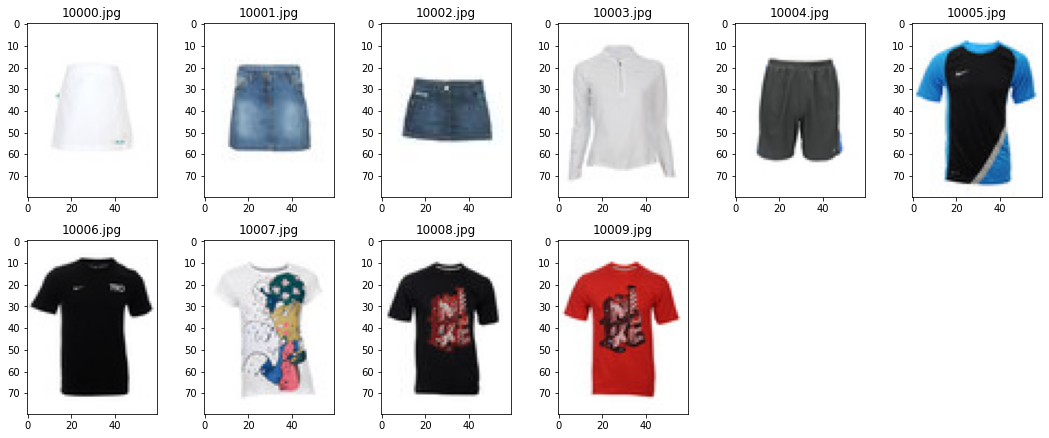

In [6]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [7]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=50000, error_bad_lines=False)
df.drop(df.columns[0], axis=1, inplace=True)
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


In [8]:
from keras.preprocessing.image import ImageDataGenerator

#image generator object from keras. reference : Keras Docs
image_generator = ImageDataGenerator(
    validation_split=0.2, rescale=1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
)

#create a flow of images for training the model.
training_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory= "/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(227,227),
    batch_size=32,
    subset="training"

)

#create a flow of images for validating(testing) the trained model.
validation_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory="/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(227,227),
    batch_size=32,
    subset="validation"
)



Found 33525 validated image filenames belonging to 3 classes.
Found 8381 validated image filenames belonging to 3 classes.


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import BatchNormalization


In [14]:
model=Sequential()
model.add(Conv2D(filters=96,strides=(4,4),kernel_size=(11,11),padding='valid',input_shape=(227,227,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=256,strides=(1,1),kernel_size=(5,5),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(Flatten())
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3,activation='softmax')) 

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_4 (Batc  (None, 55, 55, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                      

In [16]:
import keras
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
alexnet_model=model.fit(training_generator,epochs=20,validation_data=validation_generator,steps_per_epoch=len(training_generator),validation_steps=len(validation_generator))

Epoch 1/20
1048/1048 [==============================] - 534s 506ms/step - loss: 0.2087 - accuracy: 0.8909 - val_loss: 0.1209 - val_accuracy: 0.9436
Epoch 2/20
1048/1048 [==============================] - 528s 504ms/step - loss: 0.0891 - accuracy: 0.9575 - val_loss: 0.1147 - val_accuracy: 0.9333
Epoch 3/20
1048/1048 [==============================] - 566s 540ms/step - loss: 0.0740 - accuracy: 0.9650 - val_loss: 0.0764 - val_accuracy: 0.9658
Epoch 4/20
1048/1048 [==============================] - 565s 539ms/step - loss: 0.0637 - accuracy: 0.9715 - val_loss: 0.0697 - val_accuracy: 0.9654
Epoch 5/20
1048/1048 [==============================] - 518s 494ms/step - loss: 0.0544 - accuracy: 0.9749 - val_loss: 0.3183 - val_accuracy: 0.7938
Epoch 6/20
1048/1048 [==============================] - 518s 494ms/step - loss: 0.0549 - accuracy: 0.9759 - val_loss: 0.1486 - val_accuracy: 0.9196
Epoch 7/20
1048/1048 [==============================] - 524s 500ms/step - loss: 0.0500 - accuracy: 0.9776 - val_

Text(0.5, 1.0, 'Accuracy evolution')

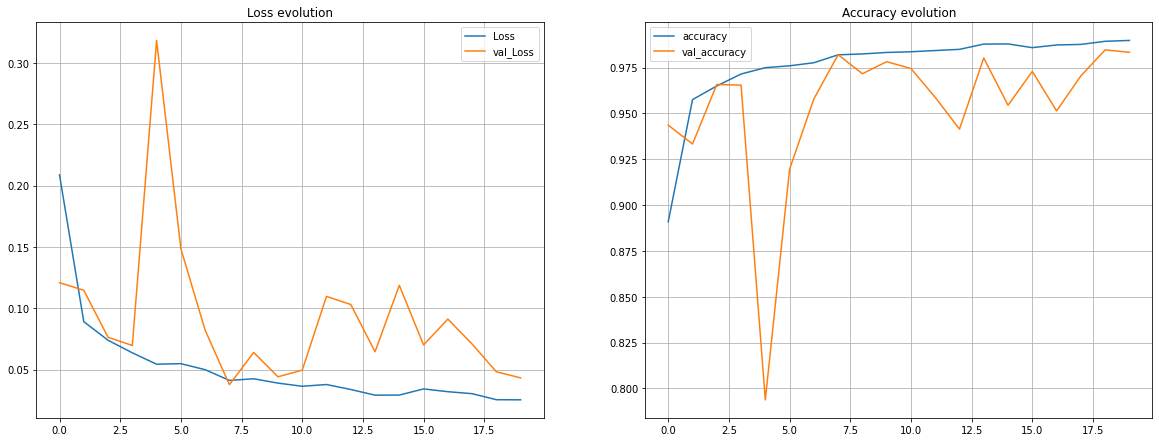

In [18]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [19]:
model.save('Alexnet.h5')

In [20]:
from keras import models
model = models.load_model('Alexnet.h5')

In [21]:
batch_size = 32
#!pip install tqdm
import tqdm
validation_generator.reset()
X_test, y_test = next(validation_generator)
for i in tqdm.tqdm(range(int(validation_generator.n/batch_size)-200)): 
  img, label = next(validation_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
print(X_test.shape, y_test.shape)

100%|██████████| 61/61 [00:41<00:00,  1.45it/s]

(1984, 227, 227, 3) (1984, 3)


In [22]:
#predicted_classes = model.predict_classes(X_test)

y_predict=model.predict(X_test) 
predicted_classes=np.argmax(y_predict,axis=1)
print(predicted_classes)

62/62 [==============================] - 2s 19ms/step
[0 2 1 ... 0 2 2]


In [23]:
y_test = np.argmax(y_test, axis = 1)

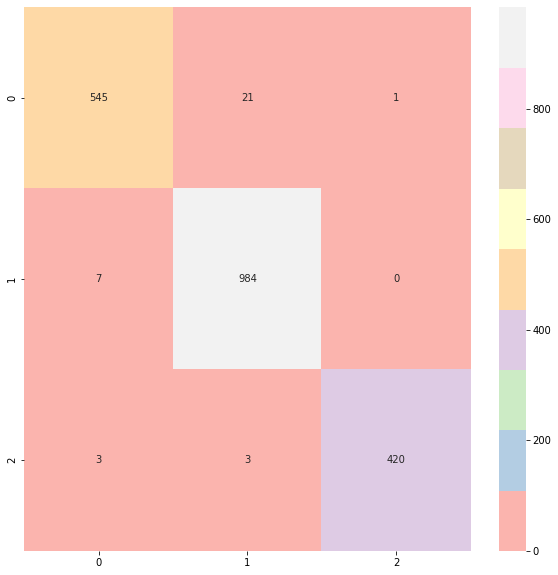

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, cmap = 'Pastel1', fmt='g')

In [25]:
cm_df = pd.DataFrame(cm)
cm_df.columns = [ 'Predicted Accessories','Predicted Apparel', 'Predicted Footwear']
cm_final_df = cm_df.rename(index={0: 'Actually Accessories', 1: 'Actually Apparel', 2: 'Actually Footwear'})
cm_final_df

,Predicted Accessories,Predicted Apparel,Predicted Footwear
Actually Accessories,545,21,1
Actually Apparel,7,984,0
Actually Footwear,3,3,420


In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision = precision_score(y_test, predicted_classes,average='macro')
Recall = recall_score(y_test, predicted_classes,average='macro')
F1_score = f1_score(y_test, predicted_classes, average='macro')

df_metrix = pd.DataFrame(data = [(Precision, Recall, F1_score)], columns = ['Precision', 'Recall', 'F1_score'])
df_metrix

,Precision,Recall,F1_score
0,0.985266,0.980017,0.982569
